In [14]:
import numpy as np
import pandas as pd
import cv2
import scipy.misc
import matplotlib.pyplot as plt 
import glob
import os
from sklearn.preprocessing import LabelEncoder
#import keras
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

Loading Data

In [15]:
poster_dest = "/Users/Adam/Desktop/Project/Movies/posters/"
train = "/Users/Adam/Desktop/Project/Movies/image-classification/dataset/train/"
test = "/Users/Adam/Desktop/Project/Movies/image-classification/dataset/test/"
df_movietotal = pd.read_csv("MovieGenre.csv", encoding='latin1')
print(df_movietotal)

       imdbId                           Imdb Link  \
0      114709  http://www.imdb.com/title/tt114709   
1      113497  http://www.imdb.com/title/tt113497   
2      113228  http://www.imdb.com/title/tt113228   
3      114885  http://www.imdb.com/title/tt114885   
4      113041  http://www.imdb.com/title/tt113041   
...       ...                                 ...   
40103   83168   http://www.imdb.com/title/tt83168   
40104   82875   http://www.imdb.com/title/tt82875   
40105  815258  http://www.imdb.com/title/tt815258   
40106   79142   http://www.imdb.com/title/tt79142   
40107   70710   http://www.imdb.com/title/tt70710   

                                    Title  IMDB Score  \
0                        Toy Story (1995)         8.3   
1                          Jumanji (1995)         6.9   
2                 Grumpier Old Men (1995)         6.6   
3                Waiting to Exhale (1995)         5.7   
4      Father of the Bride Part II (1995)         5.9   
...                  

In [16]:
df_movietotal_copy = df_movietotal.copy()
df_movietotal_copy = df_movietotal_copy.dropna(axis=0)
df_movietotal_copy = df_movietotal_copy.reset_index(drop=True)
#for i in range(len(df_movietotal_copy)):
    #try:
        #if (cv2.imread(train + str(df_movietotal_copy["imdbId"][i]) + '.jpg') == None) and (cv2.imread(test + str(df_movietotal_copy["imdbId"][i]) + '.jpg') == None):
            #df_movietotal_copy = df_movietotal_copy[df_movietotal_copy.imdbId != df_movietotal_copy["imdbId"][i]]
    #except:
        #continue
df_movietotal_copy = df_movietotal_copy.reset_index(drop=True)

In [17]:
j = 999
test_none_img = 0
train_none_img = 0
ids = []
for i in range(0, j):
    try:
        if (i < 750):
            img = cv2.imread(poster_dest + str(df_movietotal_copy["imdbId"][i]) + '.jpg')
            cv2.imwrite(train + str(df_movietotal_copy["imdbId"][i]) + '.jpg', img)
            ids.append(df_movietotal_copy["imdbId"][i])
        else:
            img = cv2.imread(poster_dest + str(df_movietotal_copy["imdbId"][i]) + '.jpg')
            cv2.imwrite(test + str(df_movietotal_copy["imdbId"][i]) + '.jpg', img)
            ids.append(df_movietotal_copy["imdbId"][i])
    except:
        print(df_movietotal_copy["imdbId"][i])
        if (i < 750):
            train_none_img = train_none_img + 1
        else:
            test_none_img = test_none_img + 1

for i in range(j, j + test_none_img + 1):
    img = cv2.imread(poster_dest + str(df_movietotal_copy["imdbId"][i]) + '.jpg')
    cv2.imwrite(test + str(df_movietotal_copy["imdbId"][i]) + '.jpg', img)
    ids.append(df_movietotal_copy["imdbId"][i])
    
j = j + test_none_img
    
for i in range(j, j + train_none_img):
    img = cv2.imread(poster_dest + str(df_movietotal_copy["imdbId"][i]) + '.jpg')
    cv2.imwrite(train + str(df_movietotal_copy["imdbId"][i]) + '.jpg', img)
    ids.append(df_movietotal_copy["imdbId"][i])
    
np.array(ids)
print()

112541
113044



In [18]:
len(df_movietotal_copy)

39246

In [19]:
genre_per_movie = []

for i in range(len(ids)):
    genre_per_movie.append(df_movietotal_copy[ids[i] == df_movietotal_copy["imdbId"]]["Genre"].apply(lambda x: str(x).split("|")))   
    
genre_per_movie2 = np.array(genre_per_movie[0])

for i in range(len(ids) - 1):
    genre_per_movie2 = np.append(genre_per_movie2, genre_per_movie[i + 1])

    
single_genre = []
for i in range(len(genre_per_movie2)):
    single_genre.append(genre_per_movie2[i][0])

single_genre = np.array(single_genre)

single_genre2 = dict()

for i in range(len(single_genre)):
    single_genre2[ids[i]] = single_genre[i]

Counting how many genres

In [20]:
import random

flat_list = []

def flatten_list(thelist):
    for sublist in thelist:
        for item in sublist:
            flat_list.append(item)
    np.array(flat_list)
    return flat_list
        
#flat_list = flatten_list(genre_per_movie)

unique, counts = np.unique(single_genre, return_counts=True)
class_names = dict(zip(unique, counts))
    
for i in range(len(single_genre)):
    if (single_genre[i] != 'Action' and single_genre[i] != 'Adventure'):
        rando = (random.randrange(0, 2, 1))
        if (rando < 1):
            single_genre[i] = 'Action'
        else:
            single_genre[i] = 'Adventure'

unique, counts = np.unique(single_genre, return_counts=True)
class_names = dict(zip(unique, counts))    
    
#del class_names['Animation']

for key, value in class_names.items():
    print (key, " = ", value)

Action  =  539
Adventure  =  461


Assigning folders

In [21]:
train_dir = "dataset"

for x in class_names:
    try:
        os.makedirs(train_dir + "\\train\\" + x)
        os.makedirs(train_dir + "\\test\\" + x)
    except:
        continue

    cur_path = train_dir + "\\train\\" + x + "\\"
    
    cur_path2 = train_dir + "\\test\\" + x + "\\"
    
    for i in range(len(single_genre)):
        
        if (x == single_genre[i]):
            original_path   = train + str(ids[i]) + ".jpg"
            image_file_name = str(ids[i]) + ".jpg"
            try:
                os.rename(original_path, cur_path + image_file_name)
            except:
                continue
                
    for i in range(len(single_genre)):
        
        if (x == single_genre[i]):
            original_path   = test + str(ids[i]) + ".jpg"
            image_file_name = str(ids[i]) + ".jpg"
            try:
                os.rename(original_path, cur_path2 + image_file_name)
            except:
                continue

In [22]:
def fd_histogram(image, mask=None):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist  = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    
    hist = hist.flatten()
    
    return hist[0:100]

Calculating features for training data

In [23]:
features = []

labels = []

new_ids = []

check = 0

for key, value in class_names.items():
    
    current_label = key
    
    for i in range(len(single_genre)):
        
        if (single_genre[i] == key):

            img = cv2.imread(train + single_genre[i] + "/" + str(ids[i]) + '.jpg')
            
            try:
                f = fd_histogram(img)
            except:
                check = 1
            
            if (check != 1):
                features.append(f)
                labels.append(current_label)
                new_ids.append(ids[i])
            
            check = 0

features = np.array(features)

labels = np.array(labels)

new_ids = np.array(new_ids)

In [24]:
print(features)
print(len(features))
print(features.shape)
print()
print()
print(labels)
print(len(labels))
print()
print()
print(new_ids)
print(len(new_ids))

[[9.81842220e-01 7.33090239e-03 3.79012618e-03 ... 5.98440995e-04
  1.49610249e-04 1.99480332e-04]
 [7.84589071e-03 9.23045969e-04 8.07665230e-04 ... 7.38436775e-03
  3.46142246e-04 1.15380746e-04]
 [2.01875344e-01 1.16269980e-02 6.38846029e-03 ... 3.83307633e-04
  0.00000000e+00 0.00000000e+00]
 ...
 [1.77220543e-04 7.63820559e-02 1.18826374e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.56424716e-02 4.62509841e-02 5.15778828e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.53877603e-04 8.46258597e-04 ... 5.92381053e-04
  6.77006901e-04 6.77006901e-04]]
751
(751, 100)


['Action' 'Action' 'Action' 'Action' 'Action' 'Action' 'Action' 'Action'
 'Action' 'Action' 'Action' 'Action' 'Action' 'Action' 'Action' 'Action'
 'Action' 'Action' 'Action' 'Action' 'Action' 'Action' 'Action' 'Action'
 'Action' 'Action' 'Action' 'Action' 'Action' 'Action' 'Action' 'Action'
 'Action' 'Action' 'Action' 'Action' 'Action' 'Action' 'Action' 'Action'
 'Action' 'Action'

In [25]:
def lda(new_ids, features, labels, class_names):

    means = dict()
    for c in class_names:
        if c != 'Western' and c != 'Film-Noir':
            means[c] = features[np.where(labels == c)].mean(axis = 0)
           
    overall_mean = features.mean(axis = 0)

    S_B = np.zeros((features.shape[1], features.shape[1]))
    for c in means.keys(): 
        if c != 'Western' and c != 'Film-Noir':
            #print(np.outer((means[c] - overall_mean), (means[c] - overall_mean)))
            S_B += (means[c] - overall_mean).dot((means[c] - overall_mean).T)
            #S_B += np.multiply(np.multiply(features[np.where(labels == c)].shape[0], features[np.where(labels == c)].shape[1]), ((means[c] - overall_mean).dot((means[c] - overall_mean).T)))
    
    S_W = np.zeros(S_B.shape)
    for c in class_names: 
        if c != 'Western' and c != 'Film-Noir':
            for i in range(len(features[np.where(labels == c)])):
                S_W += (features[np.where(labels == c)][i] - means[c]).dot((features[np.where(labels == c)][i] - means[c]).T)

    
    eigvals, eigvecs = np.linalg.eig(np.linalg.pinv(S_W).dot(S_B))
    
    eiglist = [(eigvals[i], eigvecs[:, i]) for i in range(len(eigvals))] 
    
    
    eiglist = sorted(eiglist, reverse = True)
    
    w = np.hstack((eiglist[0][1].reshape(100,1), eiglist[1][1].reshape(100,1))).real
    
    return w, means


w, mean= lda(new_ids, features, labels, class_names)


print("w.shape = ", w.shape)
print("w = ", w[0])

w.shape =  (100, 2)
w =  [0.08810352 0.00157135]


Plotting after LDA

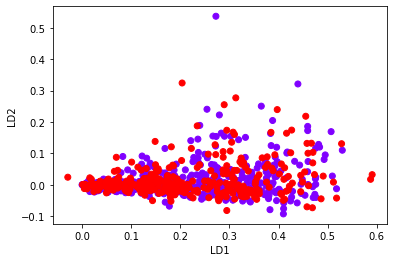

In [27]:
features_lda = np.array(features.dot(w))

features_p = pd.DataFrame(features_lda)

df = features_p.join(pd.Series(labels, name='Genre'))

le = LabelEncoder()
y = le.fit_transform(df['Genre'])

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    features_lda[:, 0],
    features_lda[:, 1],
    c=y,
    cmap='rainbow',
    alpha=1,
    #edgecolors='b'
)